In [38]:
from PIL import Image
import json
import requests
import cv2
import numpy as np
import matplotlib.pyplot as plt 

#### Reading in an image

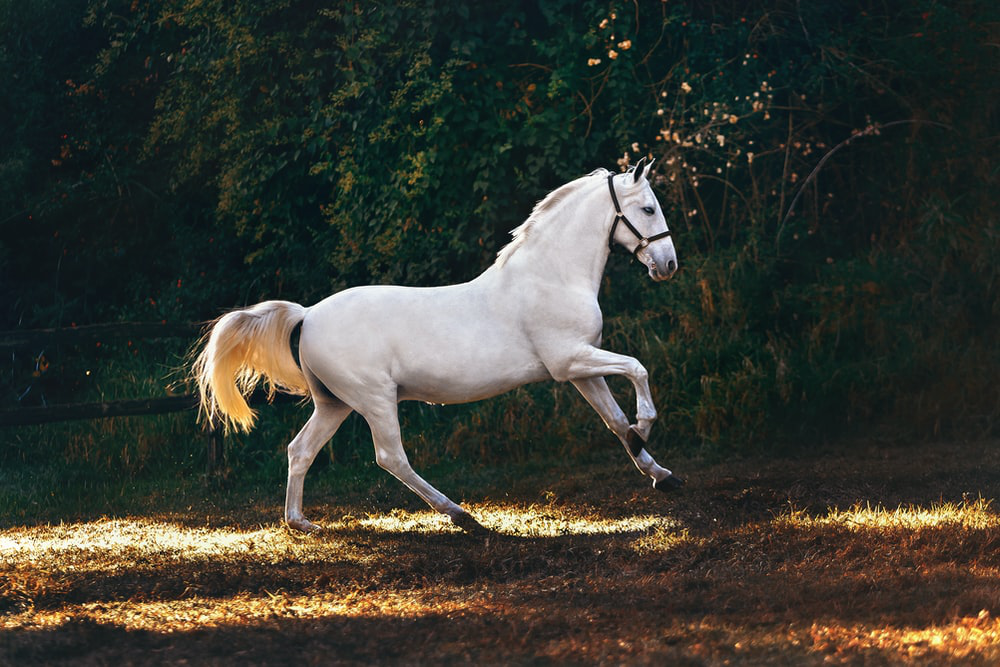

In [45]:
with open("horse_1.jpg", mode='rb') as f:
    im = Image.open(f).convert('RGB')

im

#### 0 : horse, 1: zebra

In [51]:
im = np.array(im)
url="http://localhost:8000/predict"
data = {
  "input": json.dumps(im.tolist())
}
requests.post(url, json=data).json()

{'out': 0, 'confidence': 0.8924530744552612, 'status': 200}

In [49]:
len(str(data))/1024**2

9.135782241821289

In [19]:
import cv2
def get_brightness(image, dim=10, thresh=0.5):
    # Resize image to 10x10
    image = cv2.resize(image, (dim, dim))
    # Convert color space to LAB format and extract L channel
    L, A, B = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2LAB))
    # Normalize L channel by dividing all pixel values with maximum pixel value
    L = L/np.max(L)
    # Return True if mean is greater than thresh else False
    return np.mean(L)

In [52]:
get_brightness(cv2.imread('horse_1.jpg'))

0.25669642857142855